In [689]:
import pandas as pd


# In[83]:
df = pd.read_csv('Data_Train.csv')
df.head(10)
print(df.shape)


(78458, 11)


In [690]:

#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
df.to_csv('Data_Train_Transformed_1.csv')
df = df[df['Views'] > df["Likes"]]
print(df.shape)
print(df.head())

(77170, 11)
   Unique_ID              Name     Genre Country  \
0     413890         Hardstyle  danceedm      AU   
1     249453        Dj Aladdin  danceedm      AU   
2     681116  Maxximize On Air  danceedm      AU   
3     387253       GR6 EXPLODE    rbsoul      AU   
4    1428029          Tritonal  danceedm      AU   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp   Views  Comments   Likes  Popularity  Followers  
0  2018-03-30 15:24:45.000000   14017         4   499.0        97.0     119563  
1  2016-06-20 05:58:52.000000    1918        17    49.0        17.0       2141  
2  2015-05-08 17:45:59.000000    9668        11   312.0        91.0      22248  
3  2017-06-08 

In [691]:
df.isnull().sum()

Unique_ID     0
Name          0
Genre         0
Country       0
Song_Name     1
Timestamp     0
Views         0
Comments      0
Likes         0
Popularity    0
Followers     0
dtype: int64

In [692]:
# Distribution of features by Genre
df_mean = df.groupby('Genre').mean()
df_mean

,Unique_ID,Views,Comments,Likes,Popularity,Followers
Genre,,,,,,
all-music,7.996840e+05,2.454978e+06,294.812007,36307.722834,2487.344703,9.580586e+05
alternativerock,7.715628e+05,8.545917e+05,190.173077,11453.076923,931.769231,1.935528e+05
ambient,1.101245e+06,4.262042e+05,94.012626,6845.500000,1021.780303,2.397200e+05
classical,9.667382e+05,3.931904e+05,91.676662,7339.490222,1141.687093,6.705102e+05
country,5.000266e+05,2.945058e+05,124.800595,5161.773810,712.821429,1.100058e+06
danceedm,7.100286e+05,2.673978e+05,115.092053,4892.249845,834.761185,6.596372e+05
deephouse,1.160870e+06,6.264949e+04,66.227404,1641.210070,307.310359,9.857645e+04
disco,3.550677e+05,5.235317e+05,122.627376,8923.003802,1857.562738,5.688260e+05
drumbass,5.862023e+05,3.712738e+04,67.277198,1334.828614,224.774963,5.063995e+04


In [693]:
#Correlation matrix
print(df.head())
df.drop(['Unique_ID','Country','Timestamp','Song_Name','Comments','Followers'],inplace = True, axis = 1)
df.head()


   Unique_ID              Name     Genre Country  \
0     413890         Hardstyle  danceedm      AU   
1     249453        Dj Aladdin  danceedm      AU   
2     681116  Maxximize On Air  danceedm      AU   
3     387253       GR6 EXPLODE    rbsoul      AU   
4    1428029          Tritonal  danceedm      AU   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp   Views  Comments   Likes  Popularity  Followers  
0  2018-03-30 15:24:45.000000   14017         4   499.0        97.0     119563  
1  2016-06-20 05:58:52.000000    1918        17    49.0        17.0       2141  
2  2015-05-08 17:45:59.000000    9668        11   312.0        91.0      22248  
3  2017-06-08 23:50:03.000

,Name,Genre,Views,Likes,Popularity
0,Hardstyle,danceedm,14017,499.0,97.0
1,Dj Aladdin,danceedm,1918,49.0,17.0
2,Maxximize On Air,danceedm,9668,312.0,91.0
3,GR6 EXPLODE,rbsoul,113036,2400.0,76.0
4,Tritonal,danceedm,110024,3031.0,699.0


In [694]:
# #Correlation
# import seaborn as sns
# plt.figure(figsize = (6,4))
# cmap = df.corr()
# sns.heatmap(cmap, annot = True)

In [695]:

# Remove Outliers of Popularity
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Popularity']))
df = df[(z < 3)]
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(16,8))
# #ax.scatter(df['Unique_ID'], df['Popularity'])
# ax.set_xlabel('Unique Id')
# ax.set_ylabel('Popularity')

# Remove Outliers of Views
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Views']))
df = df[(z < 3)]
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(16,8))
# #ax.scatter(df['Unique_ID'], df['Views'])
# ax.set_xlabel('Unique Id')
# ax.set_ylabel('Views')

# Remove Outliers of Likes
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Likes']))
df = df[(z < 3)]
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(16,8))
# #ax.scatter(df['Unique_ID'], df['Likes'])
# ax.set_xlabel('Unique Id')
# ax.set_ylabel('Likes')

print(df.shape)


(73394, 5)


In [696]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Extracting Genre, Likes, Popularity to X & Views to Y
#Removing outliers
labelencoder = LabelEncoder()
df['Genre'] = labelencoder.fit_transform(df['Genre'])
df['Name'] = labelencoder.fit_transform(df['Name'])
df.head()


,Name,Genre,Views,Likes,Popularity
0,394,5,14017,499.0,97.0
1,263,5,1918,49.0,17.0
2,624,5,9668,312.0,91.0
3,357,17,113036,2400.0,76.0
4,961,5,110024,3031.0,699.0


In [697]:
#Standard scaling
from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# ct = ColumnTransformer([
#         ('somename', StandardScaler(), ['Name', 'Genre', 'Likes', 'Popularity'])
#     ], remainder='passthrough')
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['Name', 'Genre', 'Likes', 'Popularity'])
    ], remainder='passthrough')
df_scaled = ct.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
print(df_scaled.head())



          0     1         2         3         4
0  0.329707  0.25  0.015994  0.006510   14017.0
1  0.220084  0.25  0.001571  0.001141    1918.0
2  0.522176  0.25  0.010000  0.006107    9668.0
3  0.298745  0.85  0.076923  0.005101  113036.0
4  0.804184  0.25  0.097147  0.046913  110024.0


D:\Applns\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [698]:
df_scaled.isnull().sum()


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [699]:
#Removing outliers using IQR
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1
#df = df[~((df["Likes"] < (Q1 - 1.5 * IQR)) |(df["Likes"] > (Q3 + 1.5 * IQR)))]
df_scaled = df_scaled[~((df_scaled < (Q1 - 1.5 * IQR)) |(df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_scaled.shape)
df_scaled.head()

(60188, 5)


,0,1,2,3,4
0,0.329707,0.25,0.015994,0.006510,14017.0
1,0.220084,0.25,0.001571,0.001141,1918.0
2,0.522176,0.25,0.010000,0.006107,9668.0
3,0.298745,0.85,0.076923,0.005101,113036.0
4,0.804184,0.25,0.097147,0.046913,110024.0


In [700]:
y = df_scaled[4]
df_scaled.drop([4],inplace = True, axis = 1)

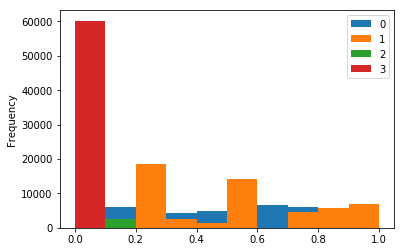

In [701]:
df_scaled.describe()
df_scaled.plot.hist()


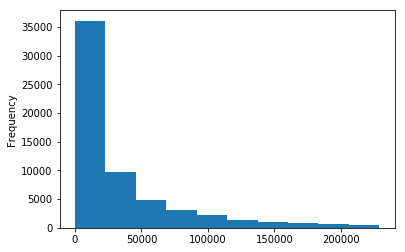

In [702]:
y.plot.hist()

In [703]:
from sklearn.model_selection import train_test_split
#print(df_scaled)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=.2, random_state=205)

              0     1         2         3
0      0.329707  0.25  0.015994  0.006510
1      0.220084  0.25  0.001571  0.001141
2      0.522176  0.25  0.010000  0.006107
3      0.298745  0.85  0.076923  0.005101
4      0.804184  0.25  0.097147  0.046913
5      0.934728  0.00  0.144231  0.021812
6      0.329707  0.25  0.032596  0.015168
7      0.215900  0.25  0.002821  0.000805
8      0.572385  1.00  0.000897  0.000470
9      0.204184  0.70  0.019936  0.003154
10     0.758159  0.25  0.012724  0.008322
11     0.661088  0.25  0.107692  0.050537
12     0.841004  0.50  0.001410  0.000000
13     0.579079  0.50  0.016410  0.004295
14     0.329707  0.25  0.025481  0.012013
15     0.502929  0.25  0.029519  0.005235
16     0.543096  0.25  0.112500  0.030403
18     0.016736  0.50  0.013077  0.002349
19     0.651046  0.00  0.075801  0.040268
20     0.972385  0.30  0.002404  0.000805
22     0.963180  0.70  0.006474  0.000940
23     0.962343  0.25  0.000224  0.000067
25     0.546444  0.25  0.030288  0

In [704]:
#XGB Boost regression
import xgboost as xgb
xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print("XGBoost - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


[03:11:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:50722.4
[1]	validation_0-rmse:46727.4
[2]	validation_0-rmse:43248.1
[3]	validation_0-rmse:40170.7
[4]	validation_0-rmse:37413.8
[5]	validation_0-rmse:35037.2
[6]	validation_0-rmse:32947.1
[7]	validation_0-rmse:31154.3
[8]	validation_0-rmse:29626.7
[9]	validation_0-rmse:28296.1


D:\Applns\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10]	validation_0-rmse:27176.7
[11]	validation_0-rmse:26186.5
[12]	validation_0-rmse:25348.3
[13]	validation_0-rmse:24655.7
[14]	validation_0-rmse:24057.4
[15]	validation_0-rmse:23502.4
[16]	validation_0-rmse:23079.5
[17]	validation_0-rmse:22712.3
[18]	validation_0-rmse:22412.6
[19]	validation_0-rmse:22119.5
[20]	validation_0-rmse:21876.3
[21]	validation_0-rmse:21694.9
[22]	validation_0-rmse:21521
[23]	validation_0-rmse:21354.9
[24]	validation_0-rmse:21220.3
[25]	validation_0-rmse:21106.3
[26]	validation_0-rmse:21010.2
[27]	validation_0-rmse:20925.9
[28]	validation_0-rmse:20856.4
[29]	validation_0-rmse:20740.4
[30]	validation_0-rmse:20686.1
[31]	validation_0-rmse:20638.2
[32]	validation_0-rmse:20582.2
[33]	validation_0-rmse:20543.1
[34]	validation_0-rmse:20469.8
[35]	validation_0-rmse:20436.1
[36]	validation_0-rmse:20395.4
[37]	validation_0-rmse:20323.6
[38]	validation_0-rmse:20280.5
[39]	validation_0-rmse:20253.1
[40]	validation_0-rmse:20208.9
[41]	validation_0-rmse:20156.2
[42]	valid

In [705]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print("RMSE - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


RMSE - Linear regression:  21757.67741474372
